Importing Dependencies

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import time
import mediapipe as mp

Keypoints using Mediapipe Holistic

In [5]:
mp_holistic = mp.solutions.holistic  # Holistic Model for detections
mp_drawing = mp.solutions.drawing_utils # Drawing utilities for drawing detections

In [162]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Color Conversion BGR to RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make Prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #Color Conversion RGB to BGR
    return image, results

In [163]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)   # Draw Face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)       # Draw Pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw Left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw Right hand connections

In [164]:
def draw_styled_landmarks(image, results):
    
    # Draw Face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), # dot color
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))# line color
    
    # Draw Pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(99,153,20), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(18,100,181), thickness=2, circle_radius=4))       
    
    # Draw Left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=4))
    
    # Draw Right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(168,97,25), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(180,56,21), thickness=2, circle_radius=4)) 

In [175]:
cap = cv2.VideoCapture(0)

# Access Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():

        # read feed 
        ret, frame = cap.read()

        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # show frame to screen
        cv2.imshow('OpenCV feed',image)

        # quit capturing
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # release camera        
    cap.release()

    # close all the windows
    cv2.destroyAllWindows()

In [176]:
len(results.face_landmarks.landmark)

468

In [177]:
len(results.pose_landmarks.landmark)

33

In [178]:
frame

array([[[253, 252, 246],
        [252, 252, 246],
        [253, 254, 248],
        ...,
        [253, 255, 254],
        [252, 255, 254],
        [251, 255, 254]],

       [[249, 251, 245],
        [249, 252, 246],
        [248, 254, 247],
        ...,
        [253, 255, 254],
        [252, 255, 254],
        [252, 255, 254]],

       [[245, 252, 245],
        [244, 253, 246],
        [243, 255, 247],
        ...,
        [253, 255, 254],
        [253, 255, 254],
        [253, 255, 254]],

       ...,

       [[120, 112, 123],
        [120, 112, 122],
        [121, 114, 122],
        ...,
        [111, 115, 113],
        [111, 120, 117],
        [111, 122, 119]],

       [[122, 109, 125],
        [124, 111, 126],
        [125, 113, 125],
        ...,
        [117, 122, 121],
        [116, 128, 126],
        [114, 130, 127]],

       [[123, 108, 126],
        [125, 110, 127],
        [126, 112, 127],
        ...,
        [115, 121, 120],
        [115, 129, 127],
        [115, 133, 130]]

In [179]:
draw_styled_landmarks(frame, results)

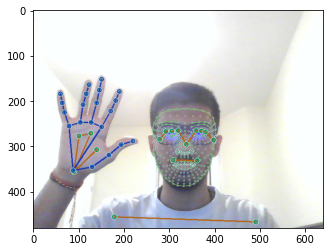

In [180]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extract Keypoint Values

In [181]:
len(results.pose_landmarks.landmark)

33

In [182]:
def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) # 33*4
#     rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63) # 21*3
#     lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63) # 21*3
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) # 468*3 
    
    pose = np.zeros(132) # 33*4
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63) # 21*3
    lh = np.zeros(63) # 21*3
    face = np.zeros(1404) # 468*3 
    return rh

In [183]:
extract_keypoints(results)

array([ 1.38401404e-01,  7.36299038e-01,  3.97482552e-07,  2.04520866e-01,
        7.20812678e-01, -2.39702761e-02,  2.61088759e-01,  6.65581286e-01,
       -3.15141976e-02,  3.03341568e-01,  6.16692066e-01, -3.79571505e-02,
        3.43762159e-01,  6.01382434e-01, -4.40496765e-02,  2.36712545e-01,
        5.36557972e-01, -1.17719350e-02,  2.68302232e-01,  4.63190645e-01,
       -2.29475237e-02,  2.84495384e-01,  4.15798664e-01, -3.48188058e-02,
        2.97248513e-01,  3.73332858e-01, -4.50083315e-02,  2.00057387e-01,
        5.15066624e-01, -1.27762388e-02,  2.18960017e-01,  4.26664472e-01,
       -2.22043209e-02,  2.29261085e-01,  3.68076622e-01, -3.37556303e-02,
        2.37228766e-01,  3.17889869e-01, -4.33406569e-02,  1.63165659e-01,
        5.14962316e-01, -1.74907055e-02,  1.73207387e-01,  4.34823662e-01,
       -2.99590547e-02,  1.83698505e-01,  3.84588242e-01, -4.28372547e-02,
        1.93165451e-01,  3.41747046e-01, -5.24449088e-02,  1.23511747e-01,
        5.32142997e-01, -

In [184]:
len(extract_keypoints(results))

63

Setup Folders for Collections

In [187]:
alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

actions = [x for x in alphabets[:3]]

In [188]:
actions

['A', 'B', 'C']

In [3]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('ASL_Alphabets')

# Actions that we try to detect

actions = np.array(actions)

NameError: name 'os' is not defined

In [2]:
for action in actions:
    try:
        os.makedirs(os.path.join(DATA_PATH, action))
    except:
        pass

NameError: name 'actions' is not defined

Collect Keypoint Values for Training and Testing 

In [191]:
cap = cv2.VideoCapture(0)

# Access Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # loop through actions
    for action in actions:
        
        # loop through sequences aka videos
        for sequence in range(no_sequences):
            
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # read feed 
                ret, frame = cap.read()

                # Make Detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Collection and wait logic
                if frame_num == 0:
                    cv2.putText(image, "Starting Collection", (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f"Collecting frames for {action} Video Number {sequence}", (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                    # show frame to screen
                    cv2.imshow('OpenCV feed',image)
                else:
                    cv2.putText(image, f"Collecting frames for {action} Video Number {sequence}", (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # show frame to screen
                    cv2.imshow('OpenCV feed',image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # quit capturing
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    cap.release()
                    cv2.destroyAllWindows()
                    quit()
        
        a = input("Enter any 'c' to continue with the next action data collection")
        if(a=='c'): continue
    # release camera        
    cap.release()

    # close all the windows
    cv2.destroyAllWindows()

Enter any 'c' to continue with the next action data collectionc
Enter any 'c' to continue with the next action data collectionc
Enter any 'c' to continue with the next action data collectionc


Preprocess Data and Create Labels and Features

In [192]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [193]:
label_map = {label:num for num,label in enumerate(actions[:3])}
label_map

{'A': 0, 'B': 1, 'C': 2}

In [194]:
sequences, labels = [], []
for action in actions[:3]:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [195]:
np.array(sequences).shape   # 90 videos with 30 frames each with 1662 keypoints per each fram 

(90, 30, 63)

In [196]:
np.array(labels).shape

(90,)

In [197]:
x = np.array(sequences)
x.shape

(90, 30, 63)

In [198]:
y = to_categorical(labels).astype(int)
y.shape

(90, 3)

In [199]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [277]:
x_train.shape

(72, 30, 63)

In [278]:
x_test.shape

(18, 30, 63)

In [279]:
y_train.shape

(72, 3)

In [280]:
y_test.shape

(18, 3)

Build and Train LSTM Neural Network

In [281]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [282]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [289]:
del model

In [290]:
model = Sequential([
    LSTM(64, return_sequences=True, activation='relu', input_shape=(30,63)),
    LSTM(128, return_sequences=True, activation='relu'),
    LSTM(64, return_sequences=False, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(actions[:3].shape[0], activation='softmax')
])

In [291]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [294]:
early_stopping = EarlyStopping(
    monitor='categorical_accuracy',
    verbose=1,            
    patience=6,
    restore_best_weights=True  
)


In [296]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0891 - categorical_accuracy: 0.5278
Epoch 2/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0998 - categorical_accuracy: 0.3333
Epoch 3/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1207 - categorical_accuracy: 0.3333
Epoch 4/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1079 - categorical_accuracy: 0.3333
Epoch 5/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0880 - categorical_accuracy: 0.3333
Epoch 6/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0698 - categorical_accuracy: 0.5556
Epoch 7/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.0388 - categorical_accuracy: 0.7917
Epoch 8/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.9193 - categorical_accuracy: 0.4583
Epoch 9/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.7153 - categorical_accuracy: 0.6528
E

3/3 [==============================] - 0s 79ms/step - loss: 0.4633 - categorical_accuracy: 0.6944
Epoch 147/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4566 - categorical_accuracy: 0.7222
Epoch 148/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4511 - categorical_accuracy: 0.7083
Epoch 149/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4540 - categorical_accuracy: 0.6944
Epoch 150/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4429 - categorical_accuracy: 0.7361
Epoch 151/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4317 - categorical_accuracy: 0.7639
Epoch 152/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4388 - categorical_accuracy: 0.8056
Epoch 153/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.4194 - categorical_accuracy: 0.7778
Epoch 154/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3997 - categorical_accuracy: 0.736

3/3 [==============================] - 0s 83ms/step - loss: 0.9294 - categorical_accuracy: 0.8194
Epoch 291/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.9146 - categorical_accuracy: 0.8472
Epoch 292/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.8984 - categorical_accuracy: 0.8333
Epoch 293/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.8823 - categorical_accuracy: 0.8056
Epoch 294/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.8653 - categorical_accuracy: 0.8194
Epoch 295/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8461 - categorical_accuracy: 0.8056
Epoch 296/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.8255 - categorical_accuracy: 0.7917
Epoch 297/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.8042 - categorical_accuracy: 0.7917
Epoch 298/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.7828 - categorical_accuracy: 0.750

3/3 [==============================] - 0s 52ms/step - loss: 0.0777 - categorical_accuracy: 0.9722
Epoch 435/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0782 - categorical_accuracy: 0.9583
Epoch 436/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0725 - categorical_accuracy: 0.9722
Epoch 437/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0817 - categorical_accuracy: 0.9722
Epoch 438/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0695 - categorical_accuracy: 0.9722
Epoch 439/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0682 - categorical_accuracy: 0.9583
Epoch 440/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0660 - categorical_accuracy: 0.9583
Epoch 441/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0670 - categorical_accuracy: 0.9722
Epoch 442/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0709 - categorical_accuracy: 0.972

3/3 [==============================] - 0s 78ms/step - loss: 0.0378 - categorical_accuracy: 0.9861
Epoch 579/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0344 - categorical_accuracy: 0.9861
Epoch 580/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0381 - categorical_accuracy: 0.9861
Epoch 581/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0340 - categorical_accuracy: 0.9861
Epoch 582/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0346 - categorical_accuracy: 0.9861
Epoch 583/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0339 - categorical_accuracy: 0.9861
Epoch 584/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0515 - categorical_accuracy: 0.9861
Epoch 585/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1477 - categorical_accuracy: 0.9306
Epoch 586/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0248 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 38ms/step - loss: 0.0253 - categorical_accuracy: 0.9861
Epoch 723/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0233 - categorical_accuracy: 0.9861
Epoch 724/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0248 - categorical_accuracy: 0.9861
Epoch 725/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0178 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0204 - categorical_accuracy: 0.9861
Epoch 727/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0265 - categorical_accuracy: 0.9861
Epoch 728/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0200 - categorical_accuracy: 0.9861
Epoch 729/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0172 - categorical_accuracy: 1.0000
Epoch 730/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0215 - categorical_accuracy: 0.986

3/3 [==============================] - 0s 79ms/step - loss: 1.0769 - categorical_accuracy: 0.4306
Epoch 867/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0722 - categorical_accuracy: 0.5833
Epoch 868/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0733 - categorical_accuracy: 0.3333
Epoch 869/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0706 - categorical_accuracy: 0.3333
Epoch 870/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0657 - categorical_accuracy: 0.3333
Epoch 871/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0611 - categorical_accuracy: 0.3333
Epoch 872/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0540 - categorical_accuracy: 0.3333
Epoch 873/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0434 - categorical_accuracy: 0.3333
Epoch 874/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0306 - categorical_accuracy: 0.652

3/3 [==============================] - 0s 90ms/step - loss: 0.8899 - categorical_accuracy: 0.3333
Epoch 1011/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.8319 - categorical_accuracy: 0.5000
Epoch 1012/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.7900 - categorical_accuracy: 0.6667
Epoch 1013/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7419 - categorical_accuracy: 0.7500
Epoch 1014/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6965 - categorical_accuracy: 0.7778
Epoch 1015/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.6676 - categorical_accuracy: 0.7083
Epoch 1016/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.6421 - categorical_accuracy: 0.6806
Epoch 1017/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.6231 - categorical_accuracy: 0.6806
Epoch 1018/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6082 - categorical_accurac

Epoch 1082/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5556 - categorical_accuracy: 0.6667
Epoch 1083/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.5457 - categorical_accuracy: 0.6667
Epoch 1084/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.5307 - categorical_accuracy: 0.6667
Epoch 1085/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5301 - categorical_accuracy: 0.6667
Epoch 1086/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.5211 - categorical_accuracy: 0.6667
Epoch 1087/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.5167 - categorical_accuracy: 0.6667
Epoch 1088/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.5119 - categorical_accuracy: 0.6667
Epoch 1089/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.5079 - categorical_accuracy: 0.6667
Epoch 1090/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.5016 - cat

3/3 [==============================] - 0s 74ms/step - loss: 0.0355 - categorical_accuracy: 0.9861
Epoch 1226/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0292 - categorical_accuracy: 0.9861
Epoch 1227/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0244 - categorical_accuracy: 1.0000
Epoch 1228/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0292 - categorical_accuracy: 1.0000
Epoch 1229/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0285 - categorical_accuracy: 1.0000
Epoch 1230/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0247 - categorical_accuracy: 1.0000
Epoch 1231/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0247 - categorical_accuracy: 1.0000
Epoch 1232/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0568 - categorical_accuracy: 0.9722
Epoch 1233/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0184 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 0.0366 - categorical_accuracy: 0.9861
Epoch 1298/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0154 - categorical_accuracy: 0.9861
Epoch 1299/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0080 - categorical_accuracy: 1.0000
Epoch 1300/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0182 - categorical_accuracy: 1.0000
Epoch 1301/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1302/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.0104 - categorical_accuracy: 1.0000
Epoch 1303/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 1304/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1305/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0059 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1370/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1371/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1372/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1373/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 1374/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1375/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1376/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1377/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0012 - categorical_accurac

Epoch 1440/2000
3/3 [==============================] - 0s 39ms/step - loss: 7.5654e-04 - categorical_accuracy: 1.0000
Epoch 1441/2000
3/3 [==============================] - 0s 34ms/step - loss: 7.5328e-04 - categorical_accuracy: 1.0000
Epoch 1442/2000
3/3 [==============================] - 0s 41ms/step - loss: 7.4951e-04 - categorical_accuracy: 1.0000
Epoch 1443/2000
3/3 [==============================] - 0s 47ms/step - loss: 7.5372e-04 - categorical_accuracy: 1.0000
Epoch 1444/2000
3/3 [==============================] - 0s 38ms/step - loss: 7.3658e-04 - categorical_accuracy: 1.0000
Epoch 1445/2000
3/3 [==============================] - 0s 40ms/step - loss: 7.3781e-04 - categorical_accuracy: 1.0000
Epoch 1446/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.2593e-04 - categorical_accuracy: 1.0000
Epoch 1447/2000
3/3 [==============================] - 0s 54ms/step - loss: 7.4116e-04 - categorical_accuracy: 1.0000
Epoch 1448/2000
3/3 [==============================] - 0

3/3 [==============================] - 0s 40ms/step - loss: 2.8518e-04 - categorical_accuracy: 1.0000
Epoch 1579/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.8907e-04 - categorical_accuracy: 1.0000
Epoch 1580/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.8411e-04 - categorical_accuracy: 1.0000
Epoch 1581/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.8260e-04 - categorical_accuracy: 1.0000
Epoch 1582/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.8261e-04 - categorical_accuracy: 1.0000
Epoch 1583/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.7948e-04 - categorical_accuracy: 1.0000
Epoch 1584/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.7796e-04 - categorical_accuracy: 1.0000
Epoch 1585/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.8027e-04 - categorical_accuracy: 1.0000
Epoch 1586/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 1.3902e-04 - categorical_accuracy: 1.0000
Epoch 1717/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.3875e-04 - categorical_accuracy: 1.0000
Epoch 1718/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.4065e-04 - categorical_accuracy: 1.0000
Epoch 1719/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.3979e-04 - categorical_accuracy: 1.0000
Epoch 1720/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.3828e-04 - categorical_accuracy: 1.0000
Epoch 1721/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.3700e-04 - categorical_accuracy: 1.0000
Epoch 1722/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.4275e-04 - categorical_accuracy: 1.0000
Epoch 1723/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.4266e-04 - categorical_accuracy: 1.0000
Epoch 1724/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 73ms/step - loss: 7.1967e-05 - categorical_accuracy: 1.0000
Epoch 1855/2000
3/3 [==============================] - 0s 85ms/step - loss: 7.1424e-05 - categorical_accuracy: 1.0000
Epoch 1856/2000
3/3 [==============================] - 0s 36ms/step - loss: 6.9726e-05 - categorical_accuracy: 1.0000
Epoch 1857/2000
3/3 [==============================] - 0s 33ms/step - loss: 6.9843e-05 - categorical_accuracy: 1.0000
Epoch 1858/2000
3/3 [==============================] - 0s 33ms/step - loss: 7.0492e-05 - categorical_accuracy: 1.0000
Epoch 1859/2000
3/3 [==============================] - 0s 35ms/step - loss: 7.1032e-05 - categorical_accuracy: 1.0000
Epoch 1860/2000
3/3 [==============================] - 0s 54ms/step - loss: 7.0830e-05 - categorical_accuracy: 1.0000
Epoch 1861/2000
3/3 [==============================] - 0s 37ms/step - loss: 7.1310e-05 - categorical_accuracy: 1.0000
Epoch 1862/2000
3/3 [==============================] - 0s 40ms/step - lo

3/3 [==============================] - 0s 75ms/step - loss: 3.9657e-05 - categorical_accuracy: 1.0000
Epoch 1993/2000
3/3 [==============================] - 0s 41ms/step - loss: 3.9527e-05 - categorical_accuracy: 1.0000
Epoch 1994/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.8943e-05 - categorical_accuracy: 1.0000
Epoch 1995/2000
3/3 [==============================] - 0s 46ms/step - loss: 3.8746e-05 - categorical_accuracy: 1.0000
Epoch 1996/2000
3/3 [==============================] - 0s 32ms/step - loss: 3.8744e-05 - categorical_accuracy: 1.0000
Epoch 1997/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.8665e-05 - categorical_accuracy: 1.0000
Epoch 1998/2000
3/3 [==============================] - 0s 31ms/step - loss: 3.8456e-05 - categorical_accuracy: 1.0000
Epoch 1999/2000
3/3 [==============================] - 0s 32ms/step - loss: 3.8475e-05 - categorical_accuracy: 1.0000
Epoch 2000/2000
3/3 [==============================] - 0s 33ms/step - lo

In [297]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 64)            32768     
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 187331 (731.76 KB)
Trainable params: 187

Make Predictions

In [298]:
res = model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [299]:
actions[np.argmax(res[5])]

'B'

In [300]:
actions[np.argmax(y_test[5])]

'B'

In [301]:
y_test

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [302]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0,

Save Weights

In [303]:
model.save('asl_till_c.h5')

C:\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
del model

In [304]:
model.load_weights('asl_till_c.h5')

Evaluation using Confusion Matrix and Accuracy

In [305]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [306]:
y_predicted = model.predict(x_train)

3/3 [==============================] - 0s 17ms/step


In [307]:
y_true = np.argmax(y_train, axis=1).tolist()
y_predicted = np.argmax(y_predicted, axis=1).tolist()

In [308]:
y_predicted

[1,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2]

In [309]:
y_true

[1,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2]

In [310]:
multilabel_confusion_matrix(y_true, y_predicted)

array([[[48,  0],
        [ 0, 24]],

       [[48,  0],
        [ 0, 24]],

       [[48,  0],
        [ 0, 24]]], dtype=int64)

In [311]:
accuracy_score(y_true, y_predicted)

1.0

Test in Real Time

In [312]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob)*100, 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [316]:
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)

# Access Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():

        # read feed 
        ret, frame = cap.read()

        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Predection Logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
    
        # Vizualizing Logic
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if(actions[np.argmax(res)] != sentence[-1]):
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        # Viz Probabilities
        image = prob_viz(res, actions[:3], image, colors)
            
        cv2.rectangle(image, (0,0), (640,40), (245, 117, 69), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # show frame to screen
        cv2.imshow('OpenCV feed',image)

        # quit capturing
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # release camera        
    cap.release()

    # close all the windows
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 110ms/step
A
1/1 [==============================] - 0s 235ms/step
A
1/1 [==============================] - 0s 53ms/step
A
1/1 [==============================] - 0s 55ms/step
A
1/1 [==============================] - 0s 37ms/step
A
1/1 [==============================] - 0s 55ms/step
A
1/1 [==============================] - 0s 30ms/step
A
1/1 [==============================] - 0s 38ms/step
A
1/1 [==============================] - 0s 28ms/step
A
1/1 [==============================] - 0s 29ms/step
A
1/1 [==============================] - 0s 38ms/step
A
1/1 [==============================] - 0s 26ms/step
A
1/1 [==============================] - 0s 36ms/step
A
1/1 [==============================] - 0s 30ms/step
A
1/1 [==============================] - 0s 34ms/step
A
1/1 [==============================] - 0s 33ms/step
A
1/1 [==============================] - 0s 29ms/step
A
1/1 [==============================] - 0s 38ms/step
A
1/1 [=====================

1/1 [==============================] - 0s 32ms/step
A
1/1 [==============================] - 0s 25ms/step
A
1/1 [==============================] - 0s 28ms/step
A
1/1 [==============================] - 0s 27ms/step
A
1/1 [==============================] - 0s 28ms/step
A
1/1 [==============================] - 0s 25ms/step
A
1/1 [==============================] - 0s 27ms/step
A
1/1 [==============================] - 0s 27ms/step
A
1/1 [==============================] - 0s 25ms/step
A
1/1 [==============================] - 0s 26ms/step
A
1/1 [==============================] - 0s 26ms/step
A
1/1 [==============================] - 0s 25ms/step
A
1/1 [==============================] - 0s 30ms/step
A
1/1 [==============================] - 0s 24ms/step
A
1/1 [==============================] - 0s 41ms/step
A
1/1 [==============================] - 0s 25ms/step
A
1/1 [==============================] - 0s 27ms/step
A
1/1 [==============================] - 0s 25ms/step
A
1/1 [=======================

In [268]:
np.argmax(model.predict(np.expand_dims(sequence, axis=0))[0])

1/1 [==============================] - 0s 75ms/step


0

In [271]:
model.predict(np.expand_dims(sequence, axis=0))[0]

1/1 [==============================] - 0s 55ms/step


array([0.6090737 , 0.11800571, 0.27292058], dtype=float32)

In [315]:
res = model.predict(np.expand_dims(sequence, axis=0))[0]
res

1/1 [==============================] - 1s 1s/step


array([0.9130429 , 0.05313736, 0.03381976], dtype=float32)

In [274]:
res[np.argmax(res)] > threshold

False

In [57]:
np.argmax(res)

13

In [69]:
res

array([[1.5568961e-03, 9.5557690e-01, 4.2866230e-02],
       [1.8249635e-03, 3.8658909e-04, 9.9778843e-01],
       [7.3054718e-09, 9.9999976e-01, 2.1046158e-07],
       [1.0805272e-05, 1.7711202e-04, 9.9981207e-01],
       [7.1464573e-17, 1.0000000e+00, 4.6314919e-15]], dtype=float32)

In [71]:
res.flatten()[np.argmax(res)]

1.0

In [153]:
res

array([0.9966408 , 0.00143195, 0.00192723], dtype=float32)

In [154]:
for num, prob in enumerate(res):
    print(num, prob)

0 0.9966408
1 0.001431954
2 0.0019272337


In [157]:
int(prob)*100

0